In [1]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


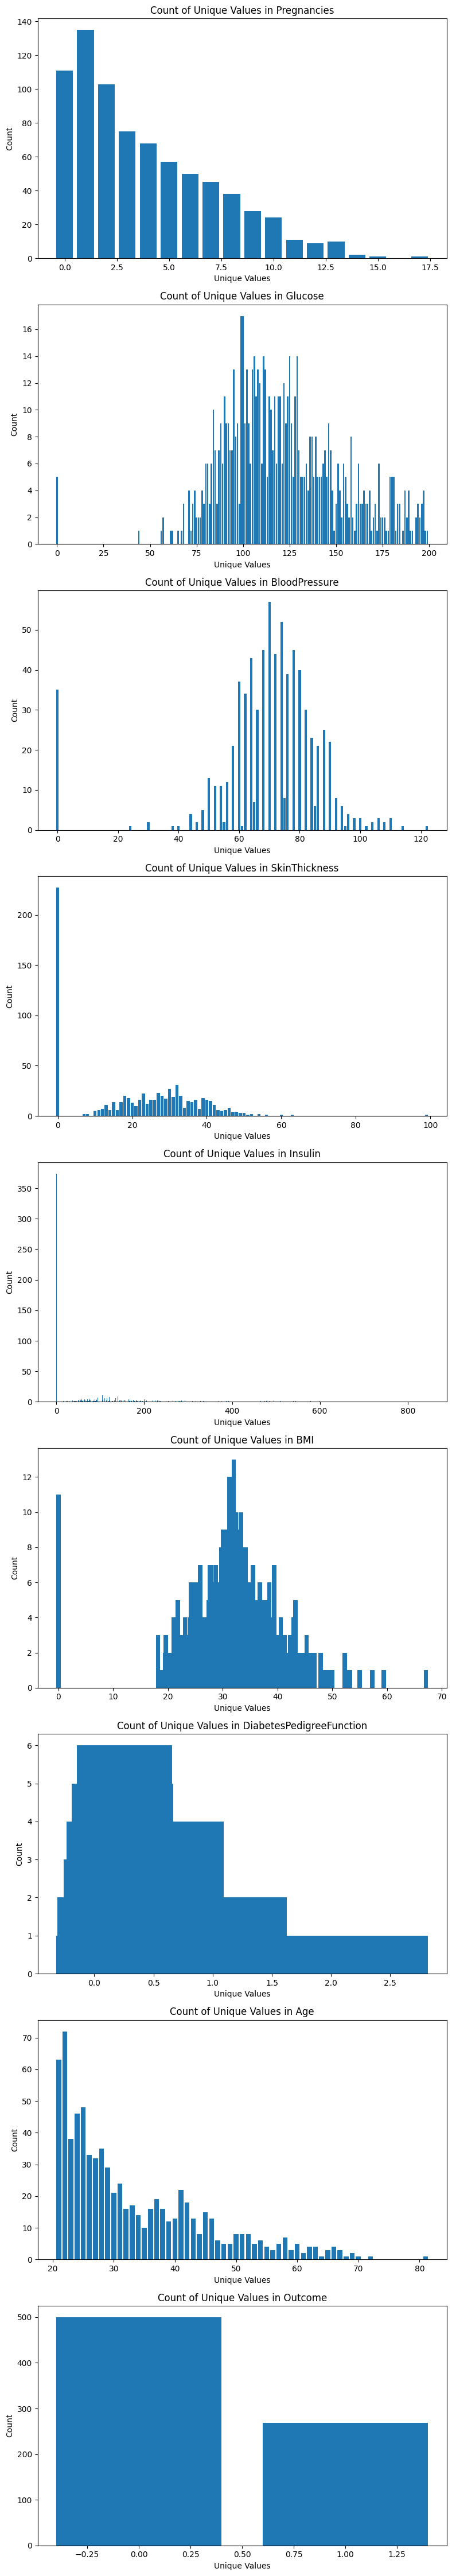

In [4]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(len(df.columns), figsize=(8, 5 * len(df.columns)))

for i, column in enumerate(df.columns):
    values = df[column]
    value_counts = values.value_counts()

    axs[i].bar(value_counts.index, value_counts)
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel('Unique Values')
    axs[i].set_title(f'Count of Unique Values in {column}')

plt.tight_layout()
plt.show()

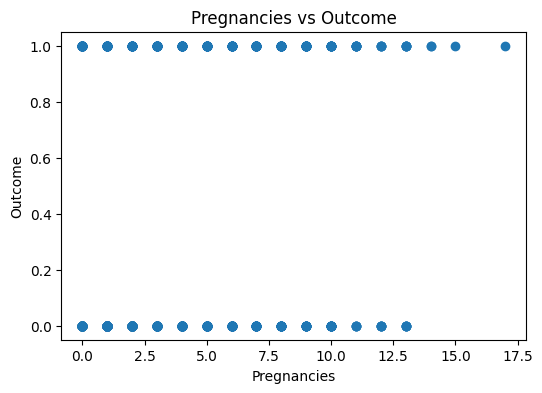

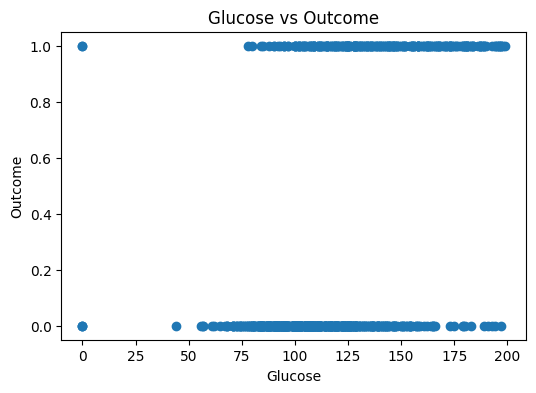

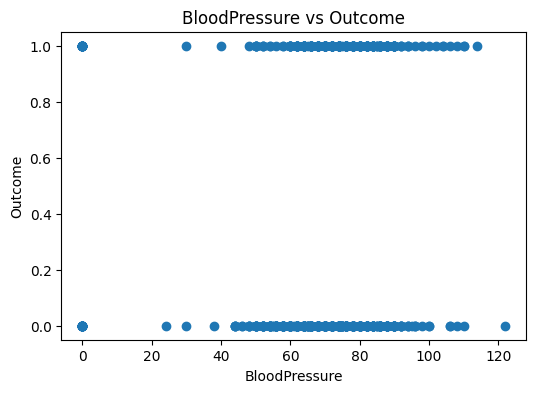

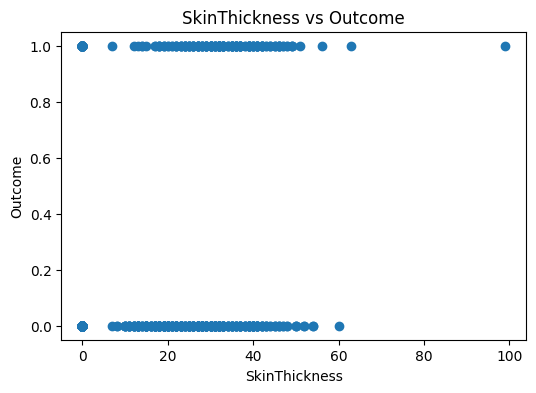

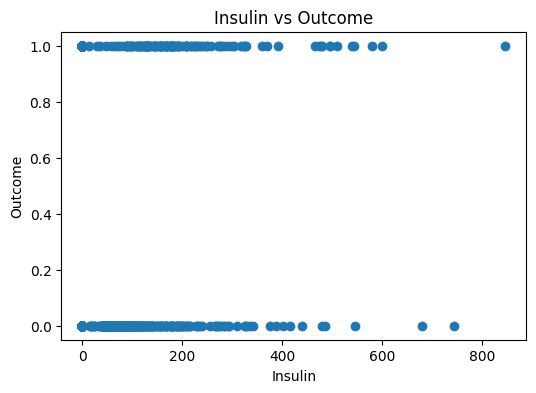

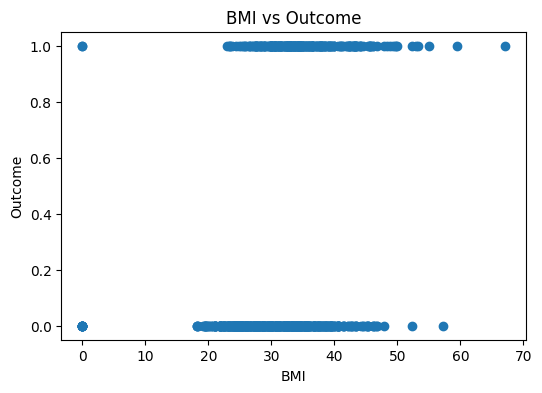

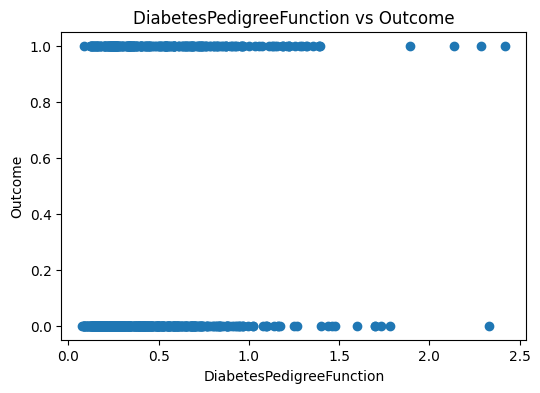

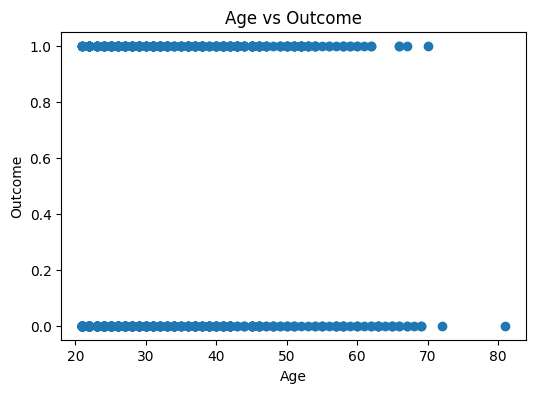

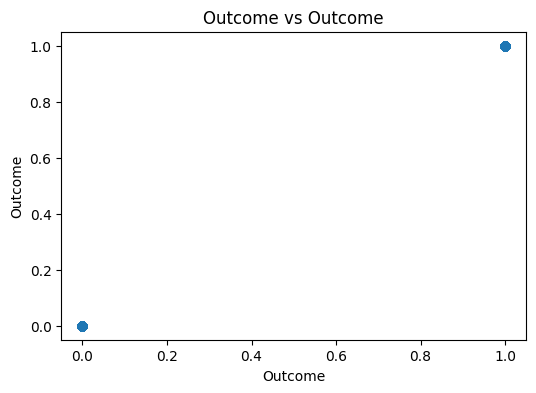

In [5]:
for column in df.columns:
    plt.figure(figsize=(6, 4))  # Adjust figure size if needed
    plt.scatter(df[column], df['Outcome'])
    plt.xlabel(column)
    plt.ylabel('Outcome')
    plt.title(f'{column} vs Outcome')
    plt.show()

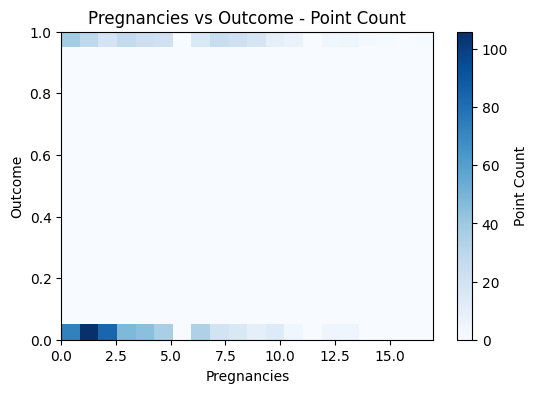

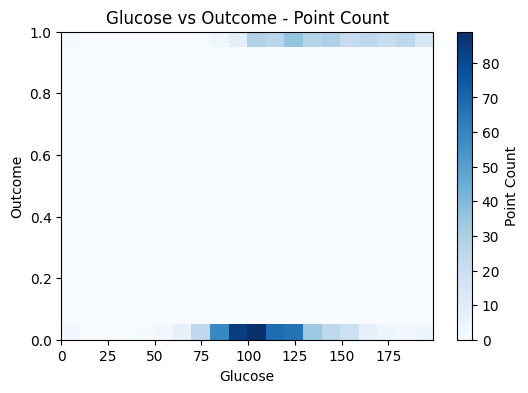

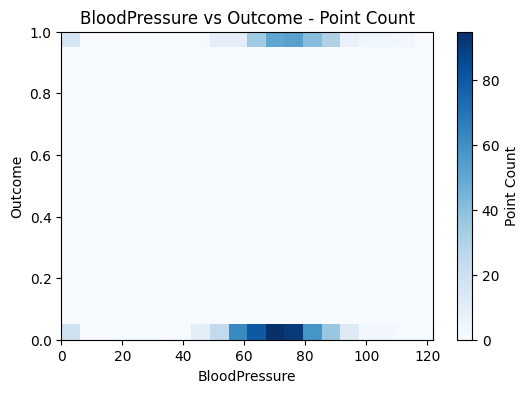

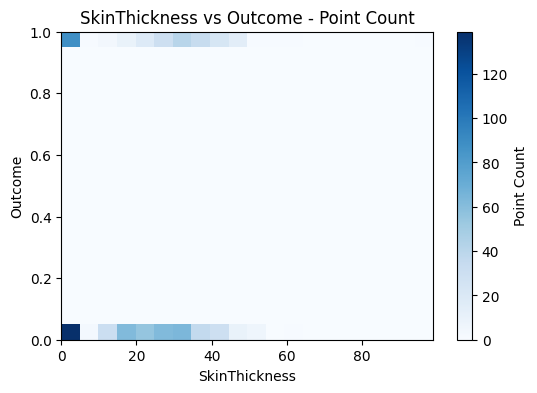

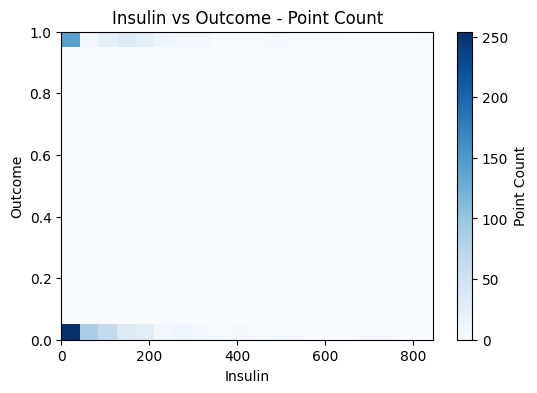

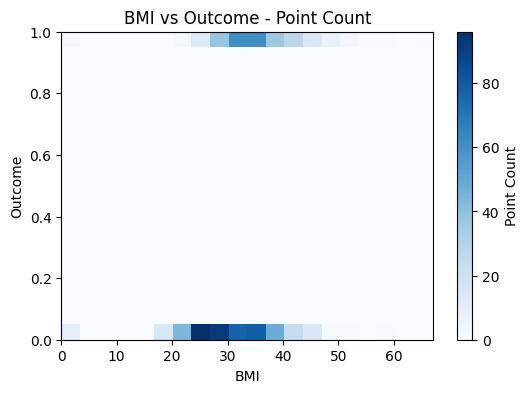

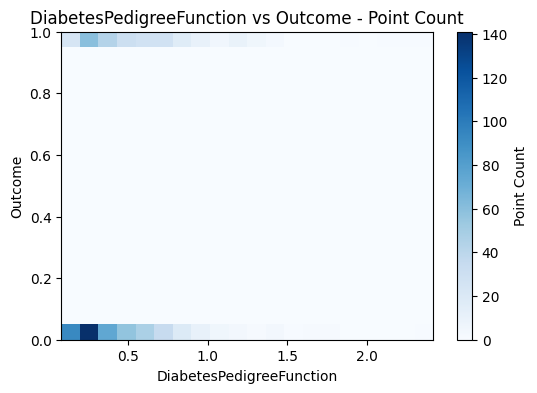

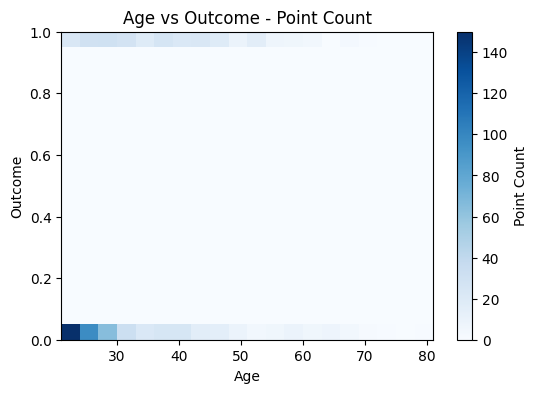

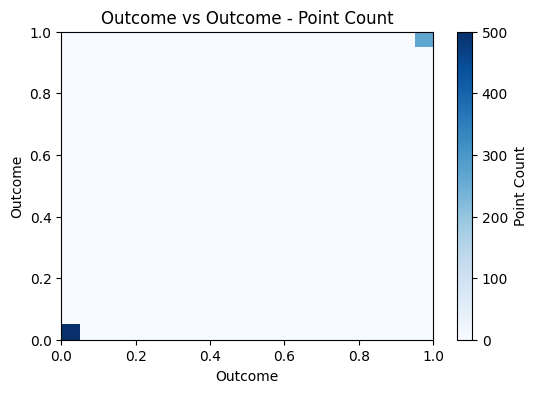

In [6]:
for column in df.columns:
    plt.figure(figsize=(6, 4))  # Adjust figure size if needed
    plt.hist2d(df[str(column)], df['Outcome'], bins=20, cmap='Blues')
    plt.xlabel(str(column))
    plt.ylabel('Outcome')
    plt.title(f'{column} vs Outcome - Point Count')
    plt.colorbar(label='Point Count')
    plt.show()

In [7]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=16)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16,max_iter=400)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
from sklearn.metrics import roc_curve, auc

y_actual = y_test  # Actual labels
y_probs = logreg.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(y_actual, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue',  label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red',  linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()